In [1]:
# Dependencies
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Read the csv file into a pandas DataFrame; Drop NAN Values
df = pd.read_csv(os.path.join("Resources", "finished_city_dfs", "Miami_df.csv")).dropna()
df.head()

,Unnamed: 0,Date and Time,Temperature,Humidity,Wind_Speed,Wind_Direction,Pressure,Weather_Description,Year,Month,...,Year Wind_Speed Average,Month Wind_Speed Max,Month Wind_Speed Min,Month Wind_Speed Average,Year Humidity Max,Year Humidity Min,Year Humidity Average,Month Humidity Max,Month Humidity Min,Month Humidity Average
0,1,2012-10-01 13:00:00,299.720000,83.0,3.0,200.0,1011.0,light intensity drizzle,2012,10,...,2.917371,15.0,0.0,3.667356,100.0,18.0,69.999061,100.0,35.0,79.172644
1,2,2012-10-01 14:00:00,299.732518,82.0,3.0,200.0,1011.0,broken clouds,2012,10,...,2.917371,15.0,0.0,3.667356,100.0,18.0,69.999061,100.0,35.0,79.172644
2,3,2012-10-01 15:00:00,299.766579,82.0,3.0,200.0,1011.0,broken clouds,2012,10,...,2.917371,15.0,0.0,3.667356,100.0,18.0,69.999061,100.0,35.0,79.172644
3,4,2012-10-01 16:00:00,299.800641,82.0,3.0,200.0,1011.0,broken clouds,2012,10,...,2.917371,15.0,0.0,3.667356,100.0,18.0,69.999061,100.0,35.0,79.172644
4,5,2012-10-01 17:00:00,299.834703,81.0,3.0,200.0,1011.0,broken clouds,2012,10,...,2.917371,15.0,0.0,3.667356,100.0,18.0,69.999061,100.0,35.0,79.172644


In [3]:
# Drop first column 
df.drop(df.columns[0], axis = 1, inplace = True) 
df.tail()

,Date and Time,Temperature,Humidity,Wind_Speed,Wind_Direction,Pressure,Weather_Description,Year,Month,Day,...,Year Wind_Speed Average,Month Wind_Speed Max,Month Wind_Speed Min,Month Wind_Speed Average,Year Humidity Max,Year Humidity Min,Year Humidity Average,Month Humidity Max,Month Humidity Min,Month Humidity Average
44146,2017-10-27 20:00:00,299.92,54.0,6.0,70.0,1015.0,broken clouds,2017,10,27,...,3.686571,15.0,0.0,3.667356,100.0,23.0,71.865435,100.0,35.0,79.172644
44147,2017-10-27 21:00:00,299.81,54.0,5.0,50.0,1015.0,broken clouds,2017,10,27,...,3.686571,15.0,0.0,3.667356,100.0,23.0,71.865435,100.0,35.0,79.172644
44148,2017-10-27 22:00:00,299.15,61.0,5.0,50.0,1014.0,broken clouds,2017,10,27,...,3.686571,15.0,0.0,3.667356,100.0,23.0,71.865435,100.0,35.0,79.172644
44149,2017-10-27 23:00:00,298.90,54.0,5.0,80.0,1014.0,broken clouds,2017,10,27,...,3.686571,15.0,0.0,3.667356,100.0,23.0,71.865435,100.0,35.0,79.172644
44150,2017-10-28 00:00:00,297.64,57.0,6.0,80.0,1015.0,broken clouds,2017,10,28,...,3.686571,15.0,0.0,3.667356,100.0,23.0,71.865435,100.0,35.0,79.172644


In [4]:
# Reshape the values

X = df[["Temperature", "Wind_Speed", "Wind_Direction", "Pressure"]]
y = df["Humidity"].values.reshape(-1, 1)

print(X.shape, y.shape)

(44151, 4) (44151, 1)


In [5]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [6]:
# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [8]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

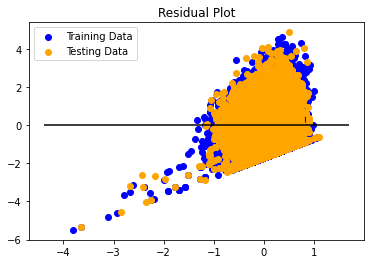

In [9]:
# Make predictions using a fitted model; build the plot

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [10]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9053392478058979, R2: 0.0892472984445476


In [11]:
# LASSO model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9051827276870577, R2: 0.08940475447158613


In [12]:
# Ridge model

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9053392422414956, R2: 0.08924730404222214


In [13]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9051044919790441, R2: 0.08948345798809021


In [14]:
from joblib import dump, load
>>> dump(model, 'Humidity_Regressions.joblib')

['Humidity_Regressions.joblib']